In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Observe que demo01.csv está na mesma pasta que este notebook
# do contrário, seria necessário indicar a pasta no nome do arquivo
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [4]:
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

mau
False    16260
True       390
Name: count, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


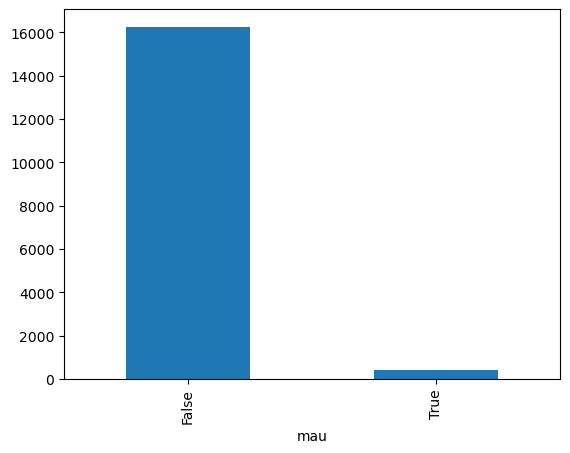

In [5]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

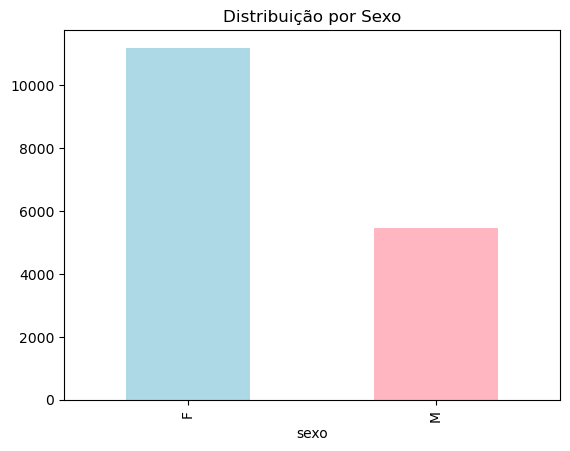

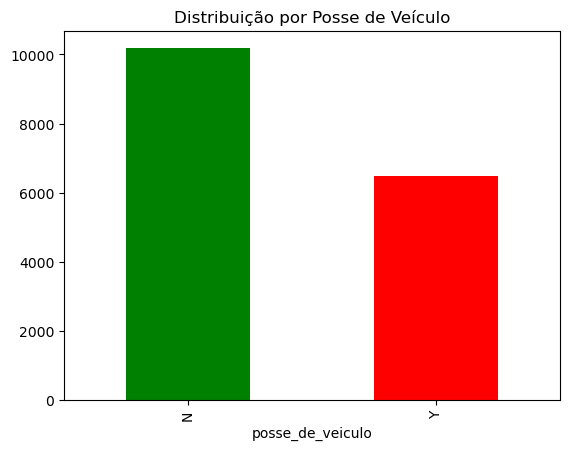

In [6]:
# ===== TAREFA 01: Gráficos de Barras =====
# Duas variáveis categóricas: 'sexo' e 'posse_de_veiculo'

# Variável 1: sexo
var = 'sexo'  
grafico_barras = df[var].value_counts().plot.bar(
    color=['lightblue', 'lightpink'],  
    title='Distribuição por Sexo'      
)
plt.show() 

# Variável 2: posse_de_veiculo
var = 'posse_de_veiculo'
grafico_barras = df[var].value_counts().plot.bar(
    color=['green', 'red'],
    title='Distribuição por Posse de Veículo'
)

In [7]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

<Figure size 640x480 with 0 Axes>

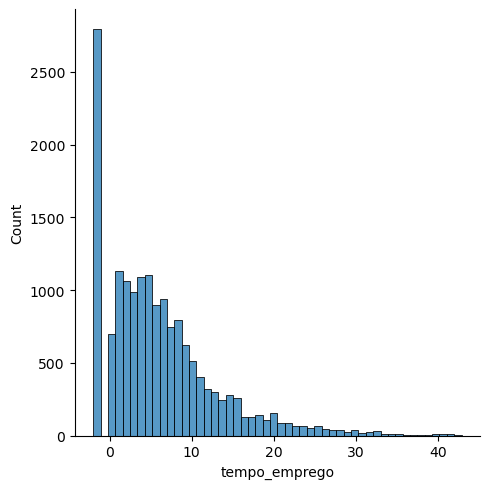

In [8]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

C:\Users\NOTE\AppData\Local\Temp\ipykernel_6372\4160224667.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


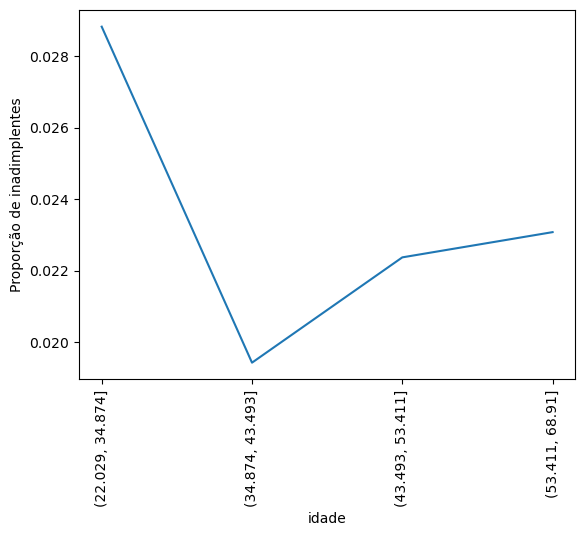

In [9]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

<Figure size 640x480 with 0 Axes>

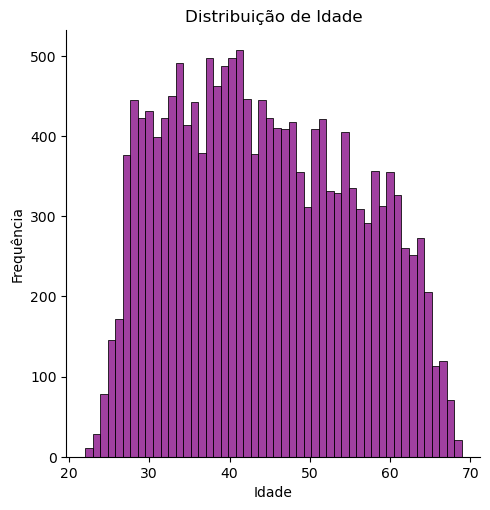

In [10]:
# ===== TAREFA 02: Histograma =====
plt.clf()  
var = "idade"


sns.displot(df, x=var, bins=50, color='purple')  
plt.title("Distribuição de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

In [11]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


C:\Users\NOTE\AppData\Local\Temp\ipykernel_6372\915720305.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


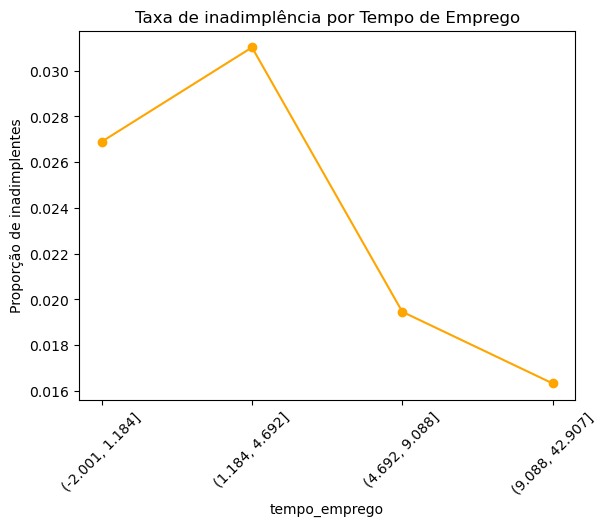

In [12]:
# ===== TAREFA 03: Análise Bivariada =====
var = 'tempo_emprego'

# Corrigir valores anômalos (-1000 → -2 anos)
df.loc[df[var] < 0, var] = -2

# Agrupar em 4 faixas usando pd.qcut
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)

# Calcular taxa de inadimplentes por faixa
biv = g['mau'].mean()

# Criar gráfico de linha
ax = biv.plot.line(marker='o', color='orange')
ax.set_ylabel("Proporção de inadimplentes")
plt.xticks(range(len(biv.index.values)), biv.index.values, rotation=45)
plt.title("Taxa de inadimplência por Tempo de Emprego")
plt.show()

In [15]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [16]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [17]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [18]:
# Tirando a v. resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [19]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [20]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.48%


In [24]:
tab = pd.crosstab(index=y_pred, columns=y_test)

val_11 = tab.get(1, {}).get(1, 0)
val_10 = tab.get(1, {}).get(0, 0)
val_01 = tab.get(0, {}).get(1, 0)
val_00 = tab.get(0, {}).get(0, 0)

print(val_10 / (val_10 + val_00) if (val_10 + val_00) != 0 else 0)
print(val_11 / (val_11 + val_01) if (val_11 + val_01) != 0 else 0)

tab

0
0


mau,False,True
row_0,,
False,4041,82
True,23,17


In [25]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [26]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.67%


In [27]:
# ===== TAREFA 04: Random Forest com mais árvores =====
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.77%


In [30]:
# ===== TAREFA 04: Random Forest com mais árvores =====
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.62%


In [31]:
# ===== TAREFA 04: Random Forest com mais árvores =====
clf = RandomForestClassifier(n_estimators=5, random_state=50)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.67%


In [33]:
tab = pd.crosstab(index=y_pred, columns=y_test)


val_10 = tab.get(1, {}).get(0, 0)
val_00 = tab.get(0, {}).get(0, 0)
val_11 = tab.get(1, {}).get(1, 0)
val_01 = tab.get(0, {}).get(1, 0)

print(val_10 / (val_10 + val_00) if (val_10 + val_00) != 0 else 0)
print(val_11 / (val_11 + val_01) if (val_11 + val_01) != 0 else 0)

tab

0
0


mau,False,True
row_0,,
False,4051,84
True,13,15
